# Assignment 3

Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:
1. Применять библиотеку SciPy для минимизации функций
2. Делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

## Введение

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.  

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

In [1]:
import numpy as np

## Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

### Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [2]:
def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

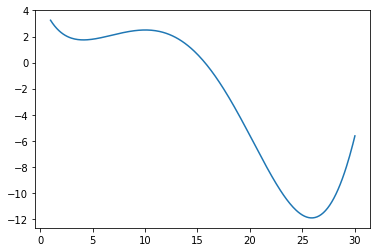

In [4]:
# Plot the function on the interval [1,30]
p = np.arange(1,30.1,.1)
plt.plot(p, f(p))
plt.show()

In [5]:
# Minimizing using Nelder-Mead method
from scipy.optimize import minimize
res = minimize(f, 5, method='Nelder-Mead')
print(res.message)
print('The first local minimum {0} in point {1}'.format(f(res.x), res.x))
res = minimize(f, 25, method='Nelder-Mead')
print(res.message)
print('The second local minimum {0} in point {1}'.format(f(res.x), res.x))

Optimization terminated successfully.
The first local minimum [1.74526829] in point [4.1362915]
Optimization terminated successfully.
The second local minimum [-11.89889467] in point [25.88020325]


In [6]:
for x in range(1,31):
    res = minimize(f, x, method='Nelder-Mead')
    print('For x = {0}, local minimum {1} in point {2}'.format(x, f(res.x), res.x))

For x = 1, local minimum [1.74526829] in point [4.13632813]
For x = 2, local minimum [1.74526829] in point [4.13632813]
For x = 3, local minimum [1.74526829] in point [4.1362793]
For x = 4, local minimum [1.74526829] in point [4.13632813]
For x = 5, local minimum [1.74526829] in point [4.1362915]
For x = 6, local minimum [1.74526829] in point [4.1362793]
For x = 7, local minimum [1.74526829] in point [4.13625488]
For x = 8, local minimum [1.74526829] in point [4.13632812]
For x = 9, local minimum [1.74526829] in point [4.13629761]
For x = 10, local minimum [-11.89889467] in point [25.88018799]
For x = 11, local minimum [-11.89889467] in point [25.8802124]
For x = 12, local minimum [-11.89889467] in point [25.8802002]
For x = 13, local minimum [-11.89889467] in point [25.88018799]
For x = 14, local minimum [-11.89889467] in point [25.88017578]
For x = 15, local minimum [-11.89889467] in point [25.88021851]
For x = 16, local minimum [-11.89889467] in point [25.88017578]
For x = 17, local

In [7]:
# Minimizing using BFGS method
ans = []
for x in (2, 30):
    res = minimize(f, x, method='BFGS')
    print(res.message)
    print('For x={0} a local minimum {1} in point {2}'.format(x, f(res.x), res.x))
    ans.append(f(res.x)[0])
ans

Optimization terminated successfully.
For x=2 a local minimum [1.74526829] in point [4.13627618]
Optimization terminated successfully.
For x=30 a local minimum [-11.89889467] in point [25.88019339]


[1.7452682903449388, -11.898894665981285]

In [8]:
ans = [round(a, 2) for a in ans]
ans

[1.75, -11.9]

In [9]:
ans1 = [str(a) for a in ans]

In [10]:
s = ' '.join(ans1)
s

'1.75 -11.9'

In [11]:
with open('submission31.txt', 'w') as file_obj:
    file_obj.write(s)

### Задача 2. Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [12]:
from scipy.optimize import differential_evolution
res = differential_evolution(f, [(1,30)])
print('The GLOBAL minimum {0} at point {1}'.format(res.fun, res.x))

The GLOBAL minimum [-11.89889467] at point [25.88019358]


In [13]:
s = str(round(res.fun[0], 2))
with open('submission32.txt', 'w') as file_obj:
    file_obj.write(s)

### Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [14]:
def h(x):
    return (np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)).astype('int64')

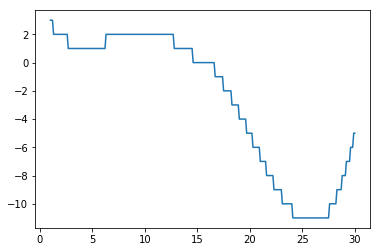

In [15]:
# Plot the function on the interval [1,30]
p = np.arange(1,30.1,.1)
plt.plot(p, h(p))
plt.show()

In [16]:
# Поиск минимума в окресностях точки х=30
ans = []
res = minimize(h, 30, method='BFGS')
print(res.message)
print('For x={0} a local minimum {1} in point {2}'.format(x, res.fun, res.x))
ans.append(res.fun[0])
ans

Optimization terminated successfully.
For x=30 a local minimum [-5] in point [30.]


[-5]

In [17]:
# Поиск глобального минимума на интервале
res = differential_evolution(h, [(1,30)])
print('The GLOBAL minimum {0} at point {1}'.format(res.fun, res.x))
ans.append(res.fun)
ans

The GLOBAL minimum -11.0 at point [27.52100601]


[-5, -11.0]

In [18]:
s = ' '.join([str(a) for a in ans])
with open('submission33.txt', 'w') as file_obj:
    file_obj.write(s)